## Analysis between Human vs Quadruped Animals

In [ ]:
!pip install biopython
!pip install scikit-bio

from google.colab import output
output.clear()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.9-cp310-cp310-linux_x86_64.whl size=2469066 sha256=a064487a06effeaa6b4a78eac6d166a2d6bd79550f615cd1961e83937c86b101
  Stored in directory: /root/.cache/pip/wheels/77/72/2c/993efbb4d69a86bee422bc96e4e2f1ec9af7cc596a08bb86e1
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size

In [ ]:
import Bio
import skbio
import scipy

In [ ]:
from Bio import Phylo, AlignIO, SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [ ]:
# Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
fasta_path = "/content/UAS - COX1 Human vs Quadruped Animals Dataset.fasta"

sequences_ = []
for seq_record in SeqIO.parse(fasta_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(fasta_path, "fasta"))

homo_sapiens__human
Seq('MFADRWLFSTNHKDIGTLYLLFGAWAGVLGTALSLLIRAELGQPGNLLGNDHIY...MKS') - 513
canis_latrans__coyote
Seq('MFINRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...IQK') - 514
canis_lupus__wolf
Seq('MFINRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...IQK') - 514
canis_lupus_familiaris__dog
Seq('MFINRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...IQK') - 514
felis_catus__cat
Seq('MFMNRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...LLK') - 514
felis_silvestris__wild_cat
Seq('MFMNRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...LLK') - 514
panthera_tigris__tiger
Seq('MFMNRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...LLK') - 514
panthera_leo__lion
Seq('MFMNRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...LLK') - 514
bos_taurus__cow
Seq('MFINRWLFSTSHKDIGTLYLLFDAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...NLK') - 514
ovis_aries__sheep
Seq('MFINRWLFSTNHKDIGTLYLLFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIY...NLK') - 514
capra_hircus__goat
Seq('MFINRWLFSTNHKDIGTLYLLFGAWAGM

In [ ]:
from Bio.Align import MultipleSeqAlignment
from Bio import Seq

# Ref: https://stackoverflow.com/questions/32833230/biopython-alignio-valueerror-says-strings-must-be-same-length
# pad sequences so that they all have the same length
maxlen = max(len(record.seq) for record in sequences)
for record in sequences:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '.')
        record.seq = Seq.Seq(sequence)
assert all(len(record.seq) == maxlen for record in sequences)

# align = AlignIO.read(fasta_path, "fasta")
# print(align)

for record in sequences:
    print(len(record.seq), "-", record.id, )

align = MultipleSeqAlignment(sequences)

518 - homo_sapiens__human
518 - canis_latrans__coyote
518 - canis_lupus__wolf
518 - canis_lupus_familiaris__dog
518 - felis_catus__cat
518 - felis_silvestris__wild_cat
518 - panthera_tigris__tiger
518 - panthera_leo__lion
518 - bos_taurus__cow
518 - ovis_aries__sheep
518 - capra_hircus__goat
518 - sus_domesticus__pig
518 - ailuropoda_melanoleuca__panda
518 - ursus_maritimus__polar_bear
518 - ursus_arctos__brown_bear
518 - equus_zebra__mountain_zebra
518 - equus_caballus__horse
518 - elephas_maximus__asian_elephant
518 - camelus_dromedarius__arabian_camel
518 - ceratotherium_simum__white_rhinoceros
518 - heteronotia_binoei__prickly_gecko
518 - giraffa_giraffa_angolensis__angolan_giraffe
518 - alligator_mississippiensis__american_alligator
518 - crocodylus_siamensis__siamese_crocodile
518 - rattus_rattus__black_rat
518 - rana_sylvatica__wood_frog
518 - apalone_spinifera__spiny_softshell_turtle


In [ ]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

homo_sapiens__human 0.000000
canis_latrans__coyote   0.077220    0.000000
canis_lupus__wolf   0.075290    0.001931    0.000000
canis_lupus_familiaris__dog 0.075290    0.001931    0.000000    0.000000
felis_catus__cat    0.075290    0.021236    0.019305    0.019305    0.000000
felis_silvestris__wild_cat  0.075290    0.021236    0.019305    0.019305    0.000000    0.000000
panthera_tigris__tiger  0.081081    0.025097    0.027027    0.027027    0.009653    0.009653    0.000000
panthera_leo__lion  0.077220    0.019305    0.021236    0.021236    0.005792    0.005792    0.011583    0.000000
bos_taurus__cow 0.094595    0.034749    0.036680    0.036680    0.034749    0.034749    0.034749    0.036680    0.000000
ovis_aries__sheep   0.083012    0.027027    0.025097    0.025097    0.027027    0.027027    0.030888    0.032819    0.011583    0.000000
capra_hircus__goat  0.084942    0.028958    0.027027    0.027027    0.028958    0.028958    0.032819    0.034749    0.015444    0.003861    0.000000
s

In [ ]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

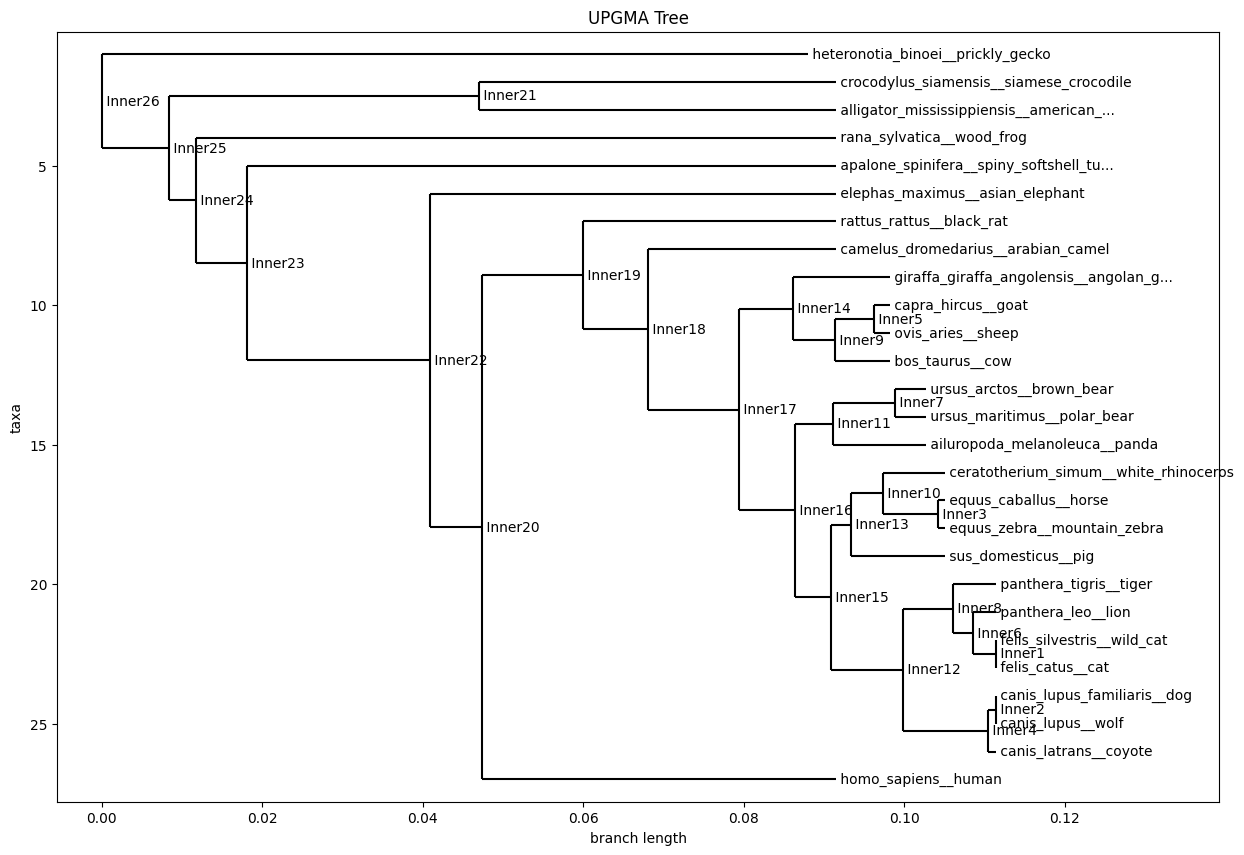

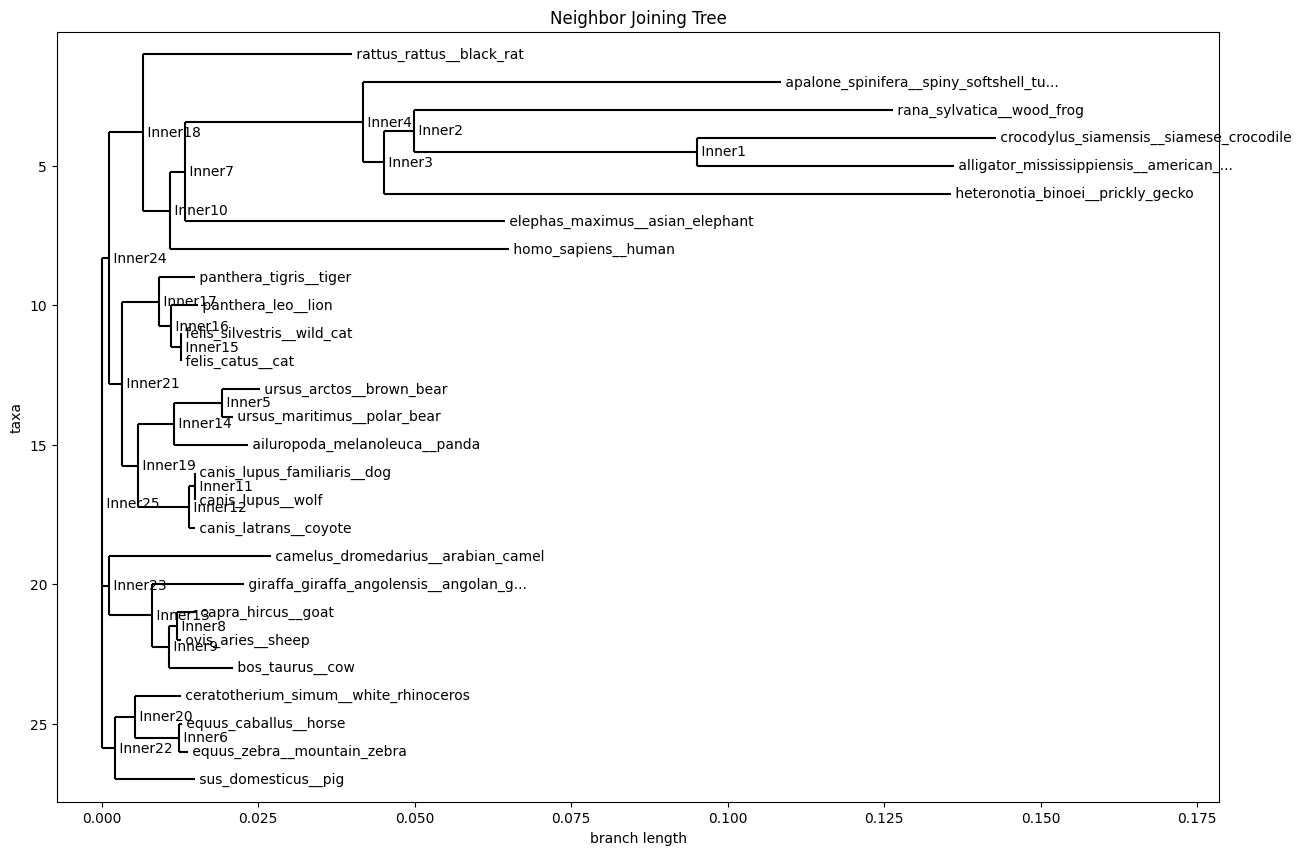

In [ ]:
import matplotlib.pyplot as plt

# Draw the phlyogenetic tree
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("UPGMA Tree")
Phylo.draw(UPGMATree, axes=ax)

# Draw the phlyogenetic tree using terminal
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Neighbor Joining Tree")
Phylo.draw(NJTree, axes=ax)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
df_distmatrix = pd.DataFrame(list(distMatrix), columns=distMatrix.names, index=distMatrix.names)

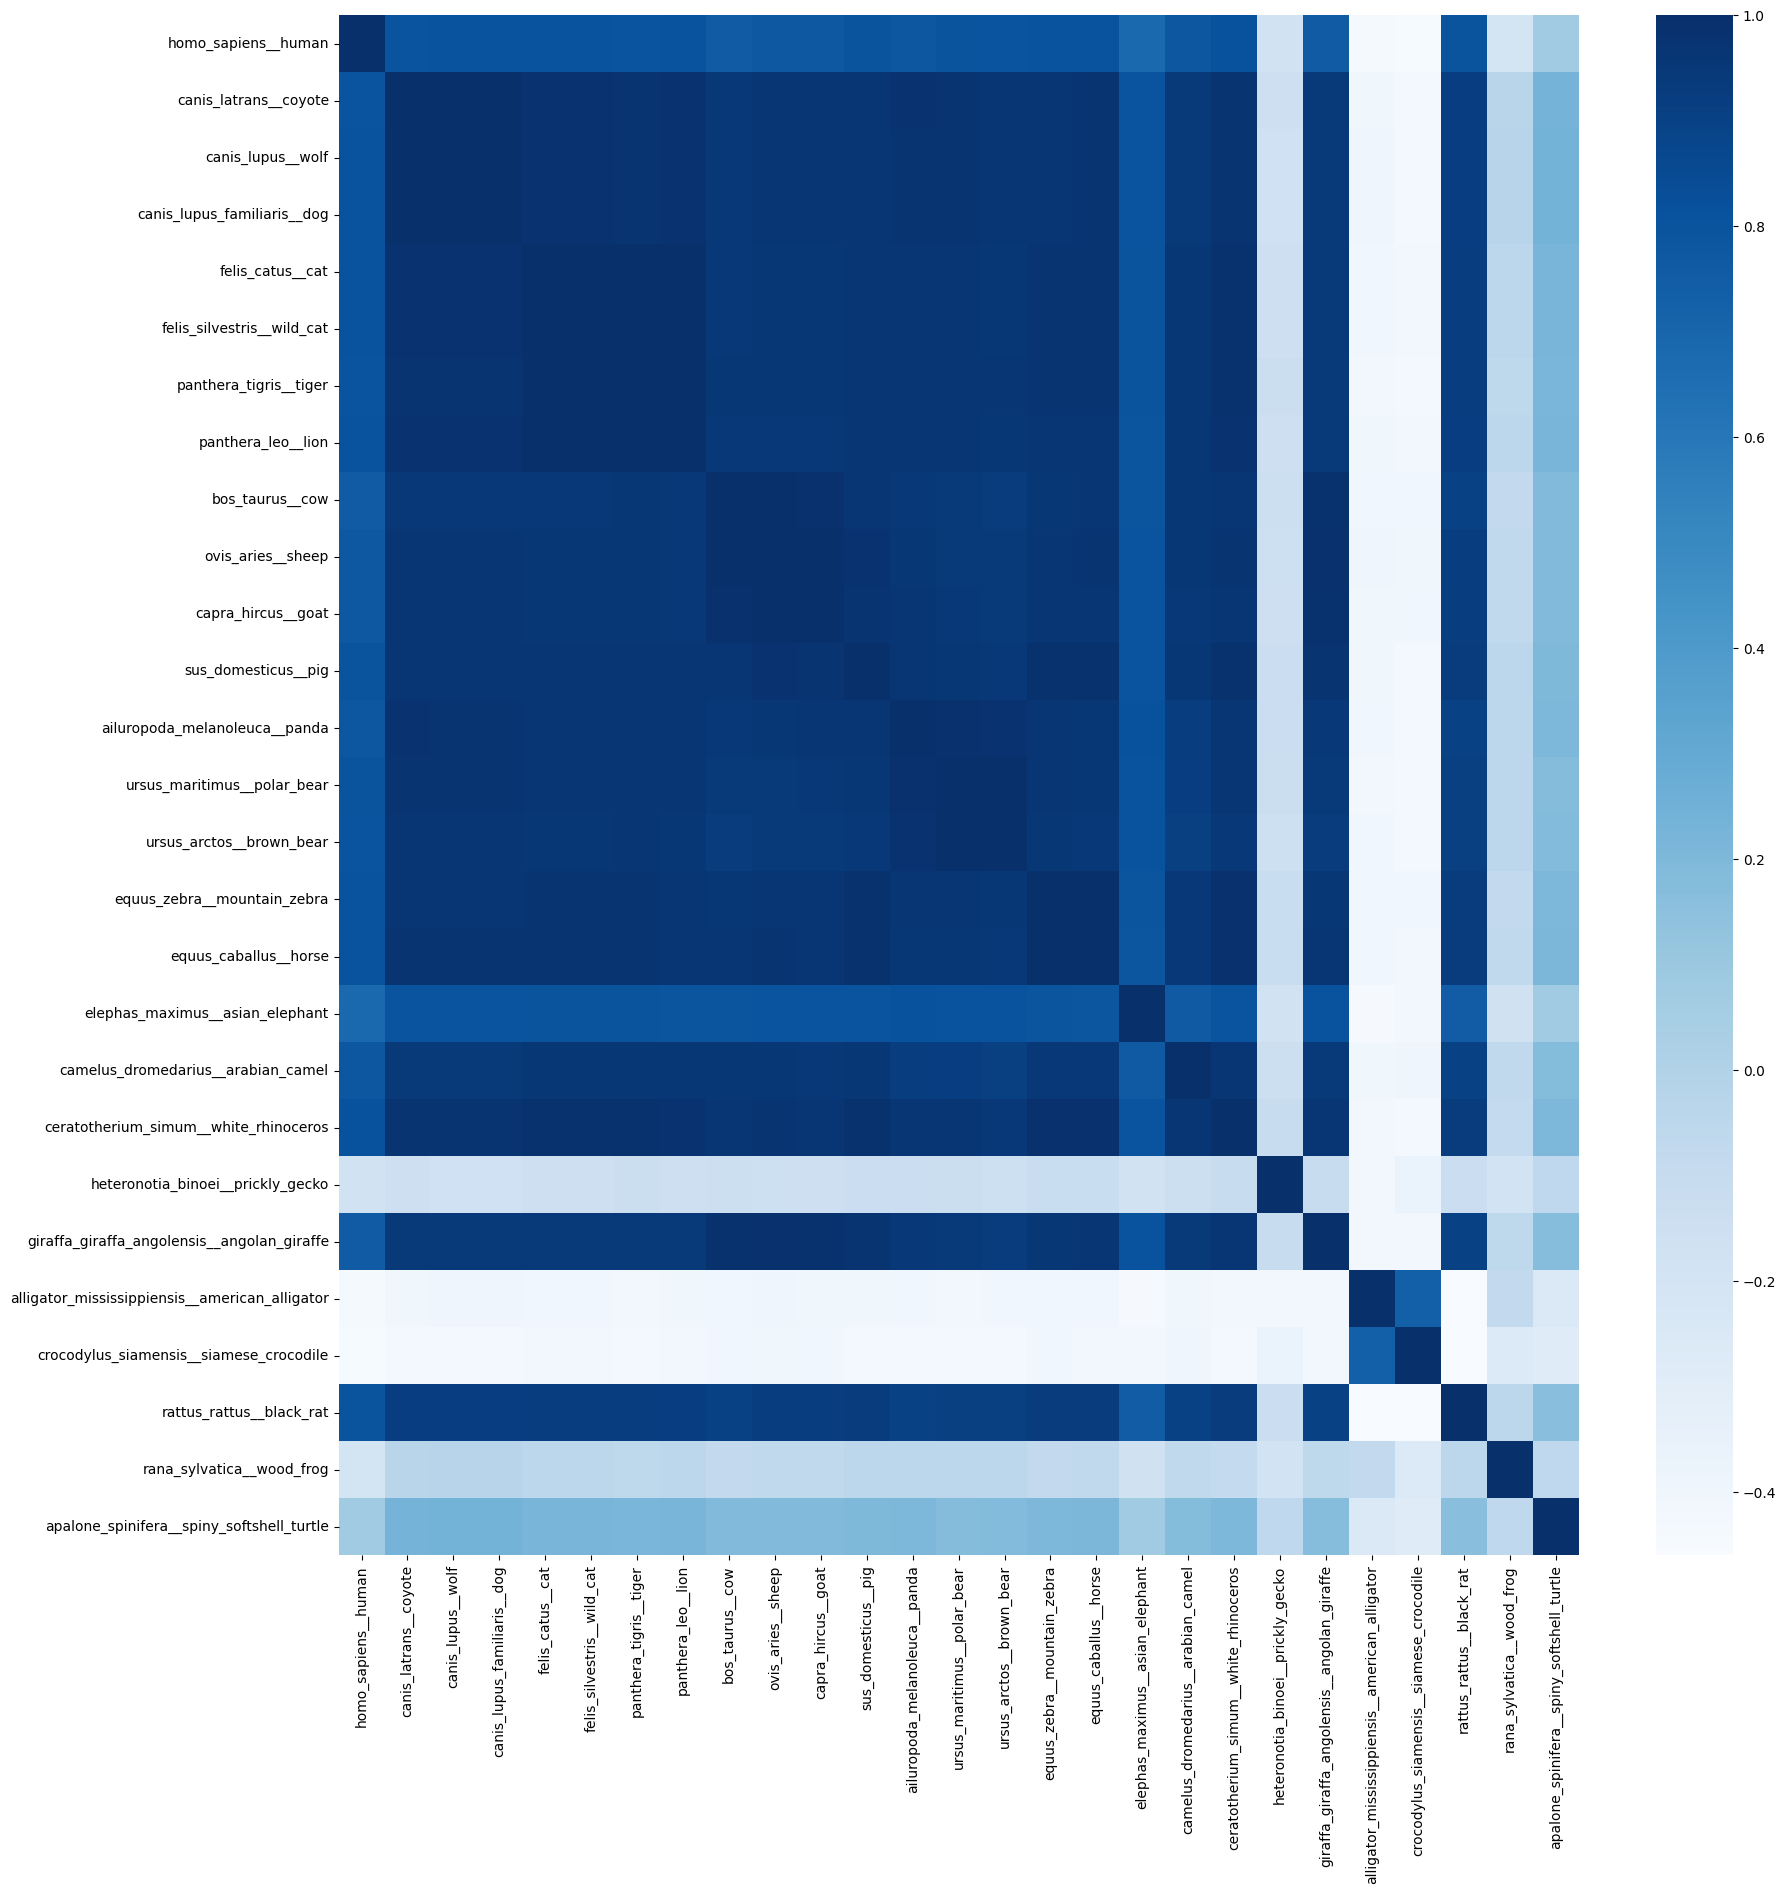

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
heatmap = sns.heatmap(
    df_distmatrix.corr(),
    # annot=True,
    cmap="Blues",
    fmt='.1g'
)
plt.rcdefaults()
plt.show()

Ref
- https://medium.com/@insidedna/biopython-to-retrieving-fasta-sequences-from-ncbi-databases-20e35772a25
- https://www.biostars.org/p/63506/#63510
- http://biopython.org/DIST/docs/tutorial/Tutorial.html
- http://scikit-bio.org/docs/0.2.1/index.html
- https://medium.com/geekculture/phylogenetic-trees-implement-in-python-3f9df96c0c32